In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import Functional_Fusion.dataset as fdata
import glob
import matplotlib.pyplot as plt


##  Group vs. individual models: Use SC1 - SC2: Evaluate models

In [ ]:
# All individual models
D = fdata.get_dataset_class(gl.base_dir,'MDTB')
# Get participants info
T = D.get_participants()
subj_name = list(T['participant_id'])
eval_models(train_dataset="MDTB", train_ses="ses-s1",
            eval_dataset = ['MDTB'], eval_ses="ses-s2",
            eval_id = 'Mds1-ind',model=subj_name,ext_list=[8])

In [ ]:
# Average model
eval_models(train_dataset="MDTB", train_ses="ses-s1",
            eval_dataset = ['MDTB'], eval_ses="ses-s2",
            eval_id = 'Mds1-ind',model='avg',ext_list=[8])

In [ ]:
# Leave one out model
eval_models(train_dataset="MDTB", train_ses="ses-s1",
            eval_dataset = ['MDTB'], eval_ses="ses-s2",
            eval_id = 'Mds1-ind',model='loo',ext_list=[8])

## Combine the evaluation files and plot

In [18]:
df=rm.comb_eval(models=['Mds1-ind','MDs1-avg','MDs1-loo'])
df['model_type'] = df['model']
df.loc[df['model'].isna() & (df.subj_id != df.eval_subj),'model_type']='diff'
df.loc[df['model'].isna() & (df.subj_id == df.eval_subj),'model_type']='same'

<AxesSubplot:xlabel='model_type', ylabel='R_eval'>

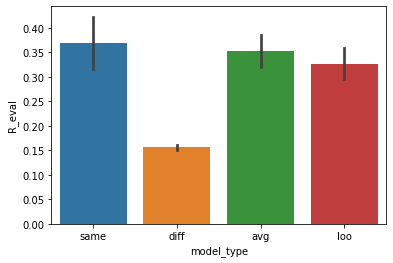

In [22]:
sns.barplot(data=df,x='model_type',y='R_eval')